In [1]:
import sys

print(sys.executable)
import os
import random
import networkx as nx
from matplotlib import pyplot as plt
import pylab
import re
import torch
import numpy as np

C:\Python310\python.exe


In [2]:
dirName = os.getcwd() + '\\train'
filenames = os.listdir(dirName)
Node_Types = []
Edge_Types = []
for filename in filenames:
    if filename.endswith(".gexf"):
        #print(filename)
        temp = nx.read_gexf(path=dirName + "\\" + filename)
        for node in temp.nodes:
            temp_type = temp.nodes[node]['type']
            if temp_type not in Node_Types:
                Node_Types.append(temp_type)
        for edge in temp.edges:
            temp_type = temp.edges[edge]['valence']
            if temp_type not in Edge_Types:
                Edge_Types.append(temp_type)

print(Node_Types)
print(Edge_Types)

['C', 'N', 'O', 'S', 'Pt', 'Cl', 'Si', 'I', 'Tb', 'Bi', 'Br', 'As', 'P', 'Co', 'B', 'F', 'Ru', 'Pb', 'Sb', 'Cu', 'Ho', 'Pd', 'Sn', 'Li', 'Hg', 'Ga']
[2, 1, 3]


10 nodes:
 ['7', '3', '5', '8', '6', '1', '9', '0', '4', '2']
9 edges:
 [('7', '3'), ('3', '1'), ('3', '8'), ('3', '9'), ('5', '2'), ('6', '2'), ('1', '0'), ('0', '2'), ('4', '2')]
{('7', '3'): 2, ('3', '1'): 1, ('3', '8'): 2, ('3', '9'): 1, ('5', '2'): 2, ('6', '2'): 1, ('1', '0'): 1, ('0', '2'): 1, ('4', '2'): 2}
{'7': 'O', '3': 'S', '5': 'O', '8': 'O', '6': 'O', '1': 'C', '9': 'O', '0': 'C', '4': 'O', '2': 'S'}


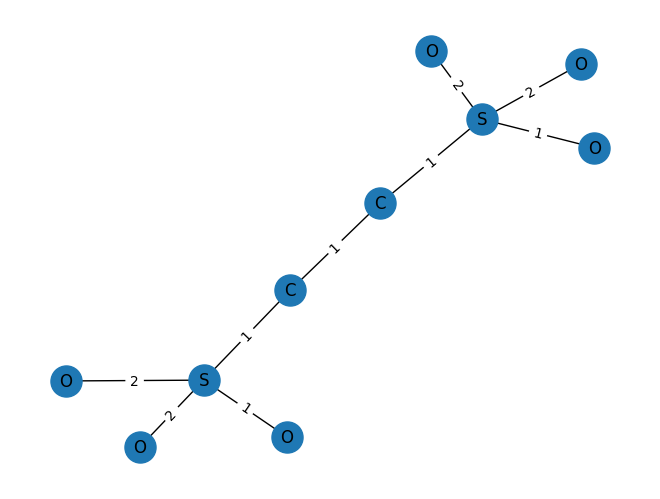

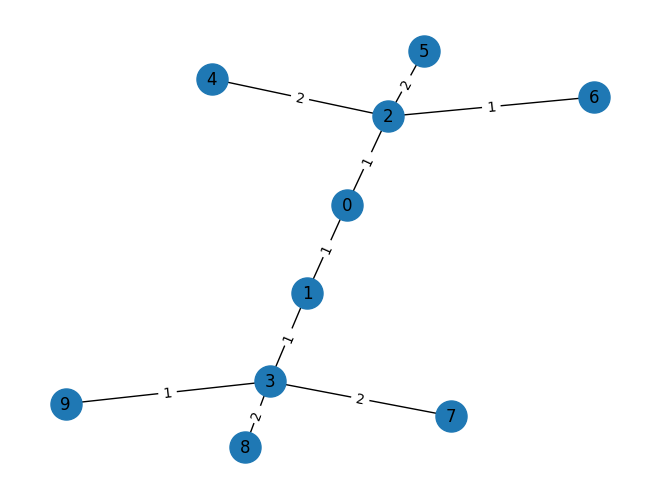

In [3]:
color_set = []
for i in range(0, len(Node_Types)):
    r = lambda: random.randint(0, 255)
    color_set.append('#{:02x}{:02x}{:02x}'.format(r(), r(), r()))


def draw_type(g):
    #    node_color_lst = []
    #    node_type_lst =  []
    #    for node in list(g.nodes()):
    #        temp = g.node[node]['type']
    #        if temp not in node_type_lst:
    #            index = Node_Types.index(temp)
    #            node_color_lst.append(color_set[index])
    #            node_type_lst.append(temp)

    pos = nx.spring_layout(g)
    edge_labels = dict([((n1, n2), d['valence']) for n1, n2, d in g.edges(data=True)])
    node_labels = nx.get_node_attributes(g, 'type')
    print(edge_labels)
    print(node_labels)
    #nx.draw(g, pos, labels=node_labels, edge_labels=edge_labels, node_size=500, node_color=node_color_lst)
    nx.draw(g, pos, labels=node_labels, node_size=500)
    nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels)
    pylab.show()


def draw_id(g):
    pos = nx.spring_layout(g)
    edge_labels = dict([((n1, n2), d['valence']) for n1, n2, d in g.edges(data=True)])
    node_labels = nx.get_node_attributes(g, 'label')
    nx.draw(g, pos, labels=node_labels, node_size=500)
    nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels)
    pylab.show()


def draw(g):
    draw_type(g)
    draw_id(g)


g = nx.read_gexf(path="./train/4.gexf")
print(str(g.number_of_nodes()) + " nodes:\n", list(g.nodes))
print(str(g.number_of_edges()) + " edges:\n", list(g.edges))
draw(g)

In [4]:
def random_node_relabeling(g, numbers):
    if numbers > g.number_of_nodes():
        numbers = g.number_of_nodes()

    # draw_type(g)
    i = 1
    lst = []

    while i <= numbers:
        # print(i,"-th random_node_relabeling")
        n = random.choice(list(g.nodes))
        assigned_type = random.choice(Node_Types)
        # print(g.node[n], assigned_type, lst)
        if (n in lst) or (g.nodes[n]['type'] == assigned_type):
            continue
        else:
            g.nodes[n]['type'] = assigned_type
            lst.append(n)
            # print(g.node[n])
            # draw_type(g)
            i += 1
    return numbers


g = nx.read_gexf(path="./train/2821.gexf")
print(random_node_relabeling(g, 5))
print(g.nodes())
print(nx.get_node_attributes(g, 'type'))

5
['7', '3', '5', '8', '6', '1', '0', '4', '2']
{'7': 'Sn', '3': 'C', '5': 'Li', '8': 'O', '6': 'N', '1': 'S', '0': 'Sn', '4': 'C', '2': 'O'}


In [5]:
def random_edge_relabeling(g, numbers):
    if numbers > g.number_of_edges():
        numbers = g.number_of_edges()

    # draw_type(g)
    i = 1
    lst = []

    while i <= numbers:
        # print(i,"-th random_edge_relabeling")
        n = random.choice(list(g.edges()))
        assigned_type = random.choice(Edge_Types)
        # print(g.edges[n], assigned_type, lst)
        if (n in lst) or (g.edges[n]['valence'] == assigned_type):
            continue
        else:
            g.edges[n]['valence'] = assigned_type
            lst.append(n)
            # print(g.edges[n])
            # draw_type(g)
            i += 1
    return numbers


g = nx.read_gexf(path="./train/4.gexf")
print(random_edge_relabeling(g, 99))

9


{('7', '3'): 2, ('3', '1'): 1, ('3', '8'): 2, ('3', '9'): 1, ('5', '2'): 2, ('6', '2'): 1, ('1', '0'): 1, ('0', '2'): 1, ('4', '2'): 2}
{'7': 'O', '3': 'S', '5': 'O', '8': 'O', '6': 'O', '1': 'C', '9': 'O', '0': 'C', '4': 'O', '2': 'S', '10': 'Tb', '11': 'Pb', '12': 'S', '13': 'Pt', '14': 'B'}


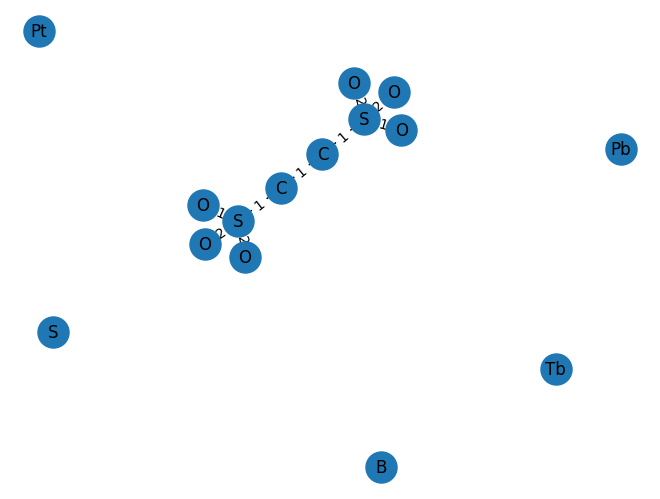

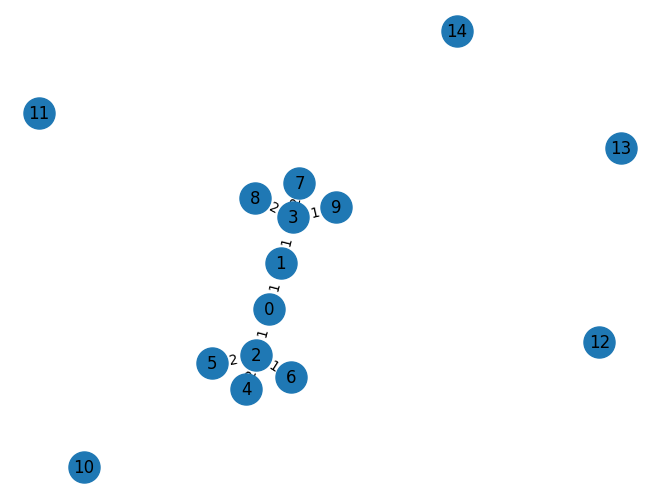

['7', '3', '5', '8', '6', '1', '9', '0', '4', '2', '10', '11', '12', '13', '14']
{'7': 'O', '3': 'S', '5': 'O', '8': 'O', '6': 'O', '1': 'C', '9': 'O', '0': 'C', '4': 'O', '2': 'S', '10': 'Tb', '11': 'Pb', '12': 'S', '13': 'Pt', '14': 'B'}


In [6]:
def random_node_insertion(g, numbers):
    i = 1
    while i <= numbers:
        # print(i,"-th random_node_insertion")
        new_id = max(list(map(int, g.nodes))) + 1
        g.add_node(str(new_id), label=str(new_id), type=random.choice(Node_Types))
        # draw(g)
        i += 1
        # print(g.nodes)
    return numbers


g = nx.read_gexf(path="./train/4.gexf")
random_node_insertion(g, 5)
draw(g)
print(g.nodes)
print(nx.get_node_attributes(g, 'type'))

In [7]:

def random_edge_deletion(g, numbers):
    Del_Edge = []
    if numbers >= g.number_of_edges():
        numbers = g.number_of_edges() - 1
    i = 1
    while i <= numbers:
        # print(i,"-th random_edge_deletion")
        n = random.choice(list(g.edges()))
        Del_Edge.append(n)
        g.remove_edge(n[0], n[1])
        # draw(g)
        i += 1
        # print(Del_Edge)
        # print(g.edges)
    return numbers, Del_Edge


g = nx.read_gexf(path="./train/8116.gexf")
print(g.edges())
n, arr = random_edge_deletion(g, 99)
print(n, arr)
print(g.edges())
print(nx.get_edge_attributes(g, 'valence'))

[('0', '1')]
0 []
[('0', '1')]
{('0', '1'): 1}


{('7', '8'): 1, ('7', '4'): 1, ('3', '5'): 2, ('3', '6'): 1, ('3', '1'): 1, ('1', '0'): 1, ('0', '2'): 1, ('4', '2'): 1}
{'7': 'O', '3': 'C', '5': 'N', '8': 'N', '6': 'N', '1': 'S', '0': 'C', '4': 'C', '2': 'C'}


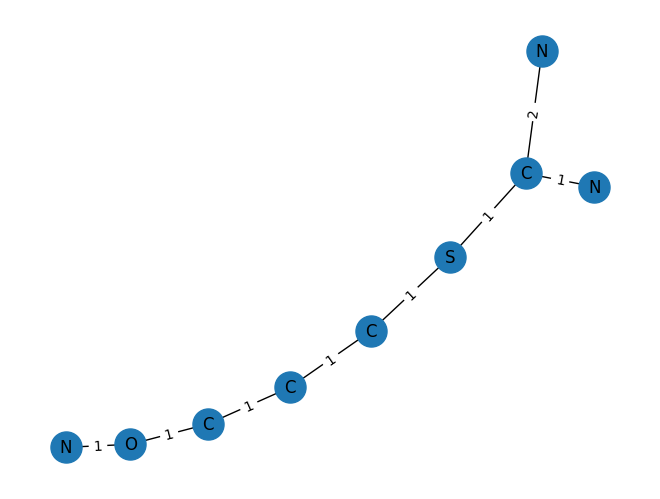

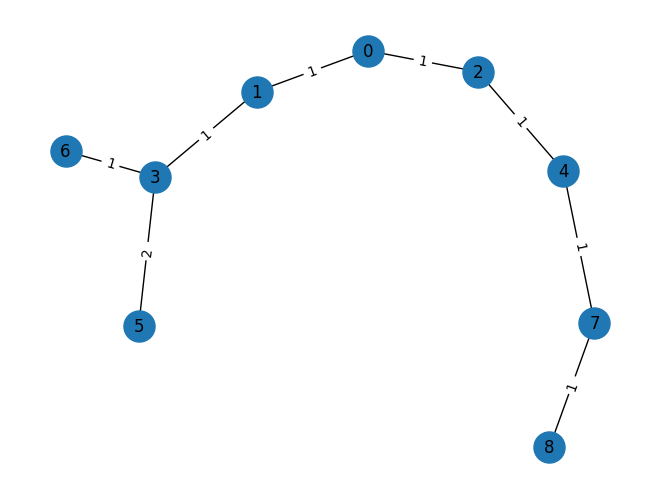

3 <class 'list'>
{('7', '8'): 1, ('7', '2'): 1, ('3', '1'): 1, ('8', '6'): 2, ('1', '0'): 1, ('0', '2'): 1, ('4', '2'): 1}
{'7': 'O', '3': 'C', '5': 'N', '8': 'N', '6': 'N', '1': 'S', '0': 'C', '4': 'C', '2': 'C'}


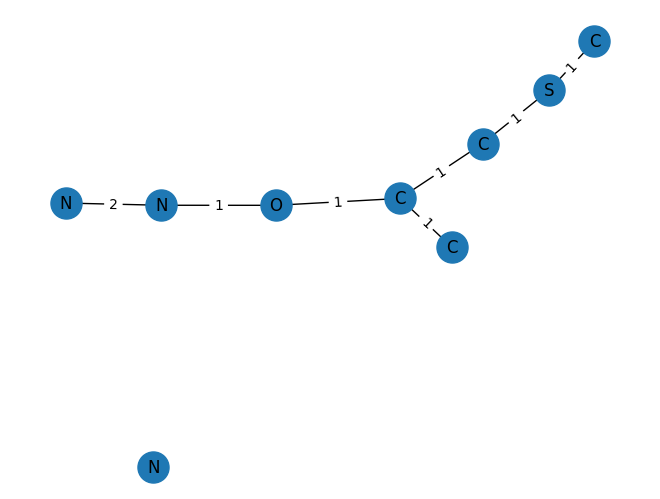

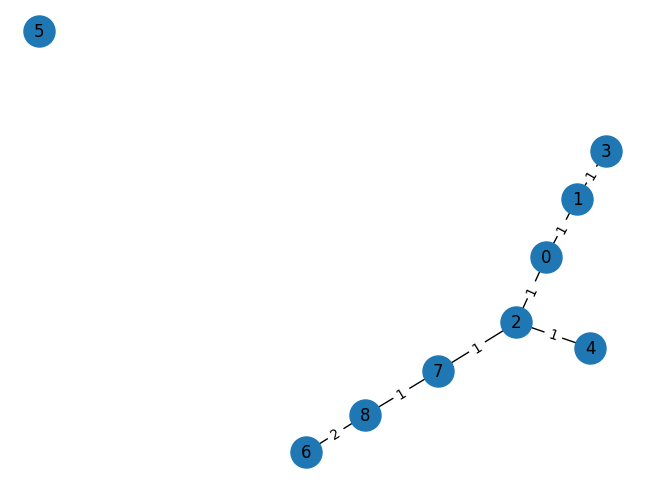

7
ei:  2
['7', '3', '5', '8', '6', '1', '0', '4', '2']
{'7': 'O', '3': 'C', '5': 'N', '8': 'N', '6': 'N', '1': 'S', '0': 'C', '4': 'C', '2': 'C'}


In [8]:

def random_edge_insertion(g, numbers, Del_Edge):
    pairs = set(list(g.nodes()))
    arr = []
    lst = list(g.nodes())

    for i in range(0, len(lst)):
        for j in range(i + 1, len(lst)):
            arr.append((lst[i], lst[j]))
    # print(arr)

    ei_arr = list(set((a, b) if a <= b else (b, a) for a, b in arr))

    for i in range(0, n):
        for j in range(i + 1, n):
            ei_arr.append((str(i), str(j)))
    # print("ei_arr",ei_arr)
    for edge in g.edges():
        # print("edge",edge)
        if (edge[0], edge[1]) in ei_arr:
            ei_arr.remove((edge[0], edge[1]))
        else:
            ei_arr.remove((edge[1], edge[0]))

    for edge in Del_Edge:
        if (edge[0], edge[1]) in ei_arr:
            ei_arr.remove((edge[0], edge[1]))
        else:
            ei_arr.remove((edge[1], edge[0]))
    max_edge = len(ei_arr)
    # print(max_edge)

    if numbers > max_edge:
        numbers = max_edge

    i = 1
    while i <= numbers:
        # print(i,"-th random_edge_insertion")
        r = random.sample(ei_arr, 1)[0]
        # print(r)
        g.add_edge(r[0], r[1], valence=random.choice(Edge_Types))
        ei_arr.remove(r)
        # draw(g)
        i += 1
        # print(g.edges)
    return numbers


g = nx.read_gexf(path="./train/2821.gexf")
draw(g)
ed, Del_Edge = random_edge_deletion(g, 3)
print(ed, type(Del_Edge))
# Del_Edge=[]
ei = random_edge_insertion(g, 2, Del_Edge)
draw(g)
print(g.number_of_edges())
print("ei: ", ei)
print(g.nodes())
print(nx.get_node_attributes(g, 'type'))

->10092.gexf
Edge Deletion 3
Edge Insertion 2
NR,NID,ER,EI,ED:  5 5 5 2 3
GEV_SUM: 20
<-10092_NR_5_NID_5_ER_5_EID_5.gexf
->10095.gexf
Edge Deletion 0
Edge Insertion 0
NR,NID,ER,EI,ED:  0 0 0 0 0
GEV_SUM: 0
<-10095_NR_0_NID_0_ER_0_EID_0.gexf
->10098.gexf
Edge Deletion 1
Edge Insertion 1
NR,NID,ER,EI,ED:  5 3 0 1 1
GEV_SUM: 10
<-10098_NR_5_NID_3_ER_0_EID_2.gexf
->101.gexf
Edge Deletion 2
Edge Insertion 2
NR,NID,ER,EI,ED:  2 0 2 2 2
GEV_SUM: 8
<-101_NR_2_NID_0_ER_2_EID_4.gexf
->10100.gexf
Edge Deletion 0
Edge Insertion 3
NR,NID,ER,EI,ED:  5 0 4 3 0
GEV_SUM: 12
<-10100_NR_5_NID_0_ER_4_EID_3.gexf
->10101.gexf
Edge Deletion 0
Edge Insertion 1
NR,NID,ER,EI,ED:  3 2 4 1 0
GEV_SUM: 10
<-10101_NR_3_NID_2_ER_4_EID_1.gexf
->10108.gexf
Edge Deletion 0
Edge Insertion 1
NR,NID,ER,EI,ED:  4 5 0 1 0
GEV_SUM: 10
<-10108_NR_4_NID_5_ER_0_EID_1.gexf
->10134.gexf
Edge Deletion 0
Edge Insertion 0
NR,NID,ER,EI,ED:  5 5 5 0 0
GEV_SUM: 15
<-10134_NR_5_NID_5_ER_5_EID_0.gexf
->1016.gexf
Edge Deletion 0
Edge Inser

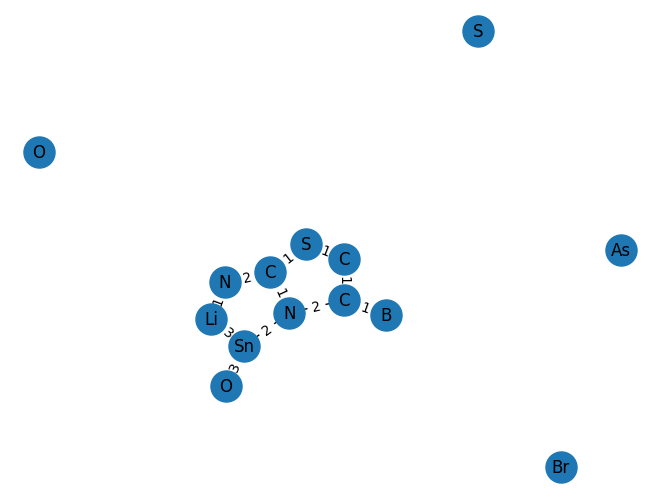

In [22]:
g = nx.read_gexf(path="./train/4.gexf")


def GPG(g, NR, NID, ER, EID):
    Del_Edge = []
    G = g
    ED = random.randint(0, EID)
    # draw(g)
    NR = random_node_relabeling(g, NR)
    NID = random_node_insertion(g, NID)
    ED, Del_Edge = random_edge_deletion(g, ED)

    ER = random_edge_relabeling(g, ER)
    EI = random_edge_insertion(g, EID - ED, Del_Edge)
    EID = EI + ED
    print("Edge Deletion", ED)
    print("Edge Insertion", EI)
    print("NR,NID,ER,EI,ED: ", NR, NID, ER, EI, ED)
    GEV = NR + NID + ER + EID
    print("GEV_SUM:", GEV)
    gev_info = "_NR_" + str(NR) + "_NID_" + str(NID) + "_ER_" + str(ER) + "_EID_" + str(EID)
    return gev_info


trainDir = os.getcwd() + '\\train'
filenames = os.listdir(trainDir)
# for i in range(5):
#     for filename in filenames:
#         if filename.endswith(".gexf"):
#             print("->"+filename)
#             g =  nx.read_gexf(path=dirName+"\\"+filename)
#             gev_info = GPG(g, random.randint(0, 5),random.randint(0, 5),random.randint(0, 5),random.randint(0, 5))
#             nx.write_gexf(G=g, path="./export/"+filename[:-5]+gev_info+".gexf")
#             print("<-"+filename[:-5]+gev_info+".gexf")

for i in range(1):
    for filename in filenames:
        if filename.endswith(".gexf"):
            print("->" + filename)
            g = nx.read_gexf(path=dirName + "\\" + filename)
            gev_info = GPG(g, random.randint(0, 5), random.randint(0, 5), random.randint(0, 5), random.randint(0, 5))
            nx.write_gexf(G=g, path="./export_test/" + filename[:-5] + gev_info + ".gexf")
            print("<-" + filename[:-5] + gev_info + ".gexf")

GPG(g, random.randint(0, 5), random.randint(0, 5), random.randint(0, 5), random.randint(0, 5))
draw_type(g)

ori 4 nr 0 nid 4 er 2 eid 5 gev 11
nlm0 {'{"O": 1}': 6, '{"S": 1}': 2, '{"C": 1}': 2}
nlm1 {'{"S": 1}': 6, '{"O": 3, "C": 1}': 2, '{"S": 1, "C": 1}': 1, '{"C": 1, "S": 1}': 1}
elm0 {'{"2": 1}': 4, '{"1": 1}': 5}
('7', '3')
{'type': 'O', 'label': '7'}
('3', '1')
{'type': 'S', 'label': '3'}
('3', '8')
{'type': 'S', 'label': '3'}
('3', '9')
{'type': 'S', 'label': '3'}
('5', '2')
{'type': 'O', 'label': '5'}
('6', '2')
{'type': 'O', 'label': '6'}
('1', '0')
{'type': 'C', 'label': '1'}
('0', '2')
{'type': 'C', 'label': '0'}
('4', '2')
{'type': 'O', 'label': '4'}
{('7', '3'): 2, ('3', '1'): 1, ('3', '8'): 2, ('3', '9'): 1, ('5', '2'): 2, ('6', '2'): 1, ('1', '0'): 1, ('0', '2'): 1, ('4', '2'): 2}
{'7': 'O', '3': 'S', '5': 'O', '8': 'O', '6': 'O', '1': 'C', '9': 'O', '0': 'C', '4': 'O', '2': 'S'}


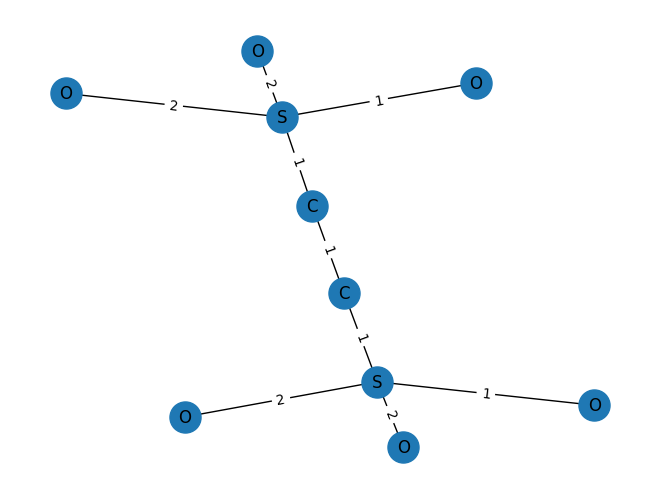

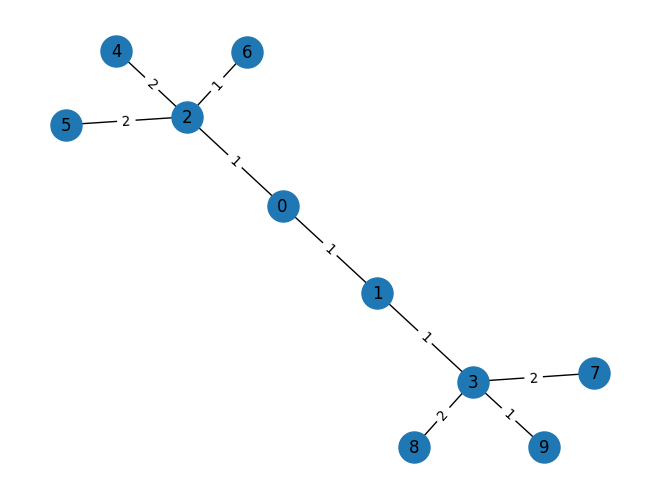

In [13]:


filename = "4_NR_0_NID_4_ER_2_EID_5.gexf"
g = nx.read_gexf(path="./export/" + filename)
# draw(g)
reg = re.sub(".*NR_(?P<nr>\d+)_NID_(?P<nid>\d+)_ER_(?P<er>\d+)_EID_(?P<eid>\d+).gexf", "\g<eid>", filename)
ori = re.sub("(?P<t>.+?)_.*", "\g<t>", filename)
nr = int(re.sub(".*NR_(?P<t>.+?)_.*", "\g<t>", filename))
nid = int(re.sub(".*NID_(?P<t>.+?)_.*", "\g<t>", filename))
er = int(re.sub(".*ER_(?P<t>.+?)_.*", "\g<t>", filename))
eid = int(re.sub(".*EID_(?P<t>.+?).gexf", "\g<t>", filename))
gev = nr + nid + er + eid
print('ori', ori, 'nr', nr, 'nid', nid, 'er', er, 'eid', eid, 'gev', gev)

g_ori = nx.read_gexf(path="./train/" + ori + ".gexf")
# draw(g_ori)
# print(nx.adjacency_matrix(g))

import json

nlm0 = {}
for node in g_ori.nodes():
    t = g_ori.nodes[node]['type']
    # print(t)
    dic = {t: 1}
    str_key = json.dumps(dic)
    if nlm0.get(str_key):
        nlm0[str_key] = nlm0.get(str_key) + 1
    else:
        nlm0[str_key] = 1

print('nlm0', nlm0)

nlm1 = {}
for node in g_ori.nodes():
    neighbors = [n for n in g_ori.neighbors(node)]
    # print(neighbors)
    dic = {}
    for neighbor in neighbors:
        t = g_ori.nodes[neighbor]['type']
        # print(t)
        if dic.get(t):
            dic[t] = dic.get(t) + 1
        else:
            dic[t] = 1

    # print(dic)
    # print(json.dumps(dic))
    if nlm1.get(json.dumps(dic)):
        nlm1[json.dumps(dic)] = nlm1.get(json.dumps(dic)) + 1
    else:
        nlm1[json.dumps(dic)] = 1

    # print('----------------')
print("nlm1", nlm1)

elm0 = {}
for edge in g_ori.edges():
    t = g_ori.edges[edge]['valence']
    # print(t)
    dic = {t: 1}
    str_key = json.dumps(dic)
    if elm0.get(str_key):
        elm0[str_key] = elm0.get(str_key) + 1
    else:
        elm0[str_key] = 1

print('elm0', elm0)

elm1 = {}
for edge in g_ori.edges():
    print(edge)
    print(g_ori.nodes[edge[0]])

draw(g_ori)

In [107]:


import torch
import torch.nn as nn
import torch.nn.functional as functional


class TensorNetworkModule(torch.nn.Module):
    def __init__(self, args, input_dim):
        super(TensorNetworkModule, self).__init__()
        self.args = args
        self.input_dim = input_dim
        self.setup_weights()
        self.init_parameters()


    def setup_weights(self):
        self.weight_matrix = torch.nn.Parameter(
            torch.Tensor(self.input_dim, self.input_dim, self.args["tensor_neurons"]))
        self.weight_matrix_block = torch.nn.Parameter(torch.Tensor(self.args["tensor_neurons"], 2 * self.input_dim))
        self.bias = torch.nn.Parameter(torch.Tensor(self.args["tensor_neurons"], 1))

    def init_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight_matrix)
        torch.nn.init.xavier_uniform_(self.weight_matrix_block)
        torch.nn.init.xavier_uniform_(self.bias)

    def forward(self, embedding_1, embedding_2):
        scoring = torch.mm(torch.t(embedding_1), self.weight_matrix.view(self.input_dim, -1))
        scoring = scoring.view(self.input_dim, self.args["tensor_neurons"])
        scoring = torch.mm(torch.t(scoring), embedding_2)
        combined_representation = torch.cat((embedding_1, embedding_2))
        block_scoring = torch.mm(self.weight_matrix_block, combined_representation)
        scores = torch.nn.functional.relu(scoring + block_scoring + self.bias)
        return scores


class GraphAggregationLayer(nn.Module):

    def __init__(self, in_features=10, out_features=10):
        super(GraphAggregationLayer, self).__init__()
        self.in_features = in_features
        self.out_features = out_features

    def forward(self, input, adj):
        h_prime = torch.mm(adj, input)
        return h_prime

    def __repr__(self):
        return self.__class__.__name__ + ' (' + str(self.in_features) + ' -> ' + str(self.out_features) + ')'


def graph_aggregation_layer(adj, features):
    hidden1 = torch.mm(adj, features)
    hidden2 = torch.mm(adj, hidden1)
    return hidden1, hidden2


class TaGSim(torch.nn.Module):
    def __init__(self, args, number_of_node_labels, number_of_edge_labels):
        super(TaGSim, self).__init__()
        self.args = args
        self.number_of_node_labels = len(number_of_node_labels)
        self.number_of_edge_labels = len(number_of_edge_labels)
        self.bottle_neck_neurons = args["bottle_neck_neurons"]
        self.setup_layers()

    def gal_pass(self, edge_index, features):
        hidden1 = self.gal1(features, edge_index)
        hidden2 = self.gal2(hidden1, edge_index)
        return hidden1, hidden2

    def setup_layers(self):
        self.gal1 = GraphAggregationLayer()
        self.gal2 = GraphAggregationLayer()
        self.feature_count = self.args["tensor_neurons"]

        self.tensor_network_nc = TensorNetworkModule(self.args, 2 * self.number_of_node_labels)
        self.tensor_network_in = TensorNetworkModule(self.args, 2 * self.number_of_node_labels)
        self.tensor_network_ie = TensorNetworkModule(self.args, 2 * self.number_of_node_labels)
        self.tensor_network_ec = TensorNetworkModule(self.args, 2 * self.number_of_edge_labels)

        self.fully_connected_first_nc = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_nc = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_nc = torch.nn.Linear(8, 4)
        self.scoring_layer_nc = torch.nn.Linear(4, 1)

        self.fully_connected_first_in = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_in = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_in = torch.nn.Linear(8, 4)
        self.scoring_layer_in = torch.nn.Linear(4, 1)

        self.fully_connected_first_ie = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_ie = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_ie = torch.nn.Linear(8, 4)
        self.scoring_layer_ie = torch.nn.Linear(4, 1)

        self.fully_connected_first_ec = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_ec = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_ec = torch.nn.Linear(8, 4)
        self.scoring_layer_ec = torch.nn.Linear(4, 1)

    def forward(self, data):
        adj_1, adj_2 = torch.FloatTensor(np.array(data["edge_index_1"].todense())), torch.FloatTensor(
            np.array(data["edge_index_2"].todense()))
        edge_adj_1, edge_adj_2 = data["edge_adj_1"], data["edge_adj_2"]
        node_features_1, node_features_2 = data["node_features_1"], data["node_features_2"]
        edge_features_1, edge_features_2 = data["edge_features_1"], data["edge_features_2"]

        #gal
        graph1_hidden1, graph1_hidden2 = self.gal_pass(adj_1, node_features_1)  #
        graph2_hidden1, graph2_hidden2 = self.gal_pass(adj_2, node_features_2)  #
        edge1_hidden1, edge1_hidden2 = self.gal_pass(edge_adj_1, edge_features_1)
        edge2_hidden1, edge2_hidden2 = self.gal_pass(edge_adj_2, edge_features_2)

        #node level embedding Concatenation
        graph1_01concat = torch.cat([node_features_1, graph1_hidden1], dim=1)
        graph2_01concat = torch.cat([node_features_2, graph2_hidden1], dim=1)
        graph1_12concat = torch.cat([graph1_hidden1, graph1_hidden2], dim=1)
        graph2_12concat = torch.cat([graph2_hidden1, graph2_hidden2], dim=1)

        #graph pooling: node Sum
        graph1_01pooled = torch.sum(graph1_01concat, dim=0).unsqueeze(1)
        graph2_01pooled = torch.sum(graph2_01concat, dim=0).unsqueeze(1)
        graph1_12pooled = torch.sum(graph1_12concat, dim=0).unsqueeze(1)
        graph2_12pooled = torch.sum(graph2_12concat, dim=0).unsqueeze(1)

        #edge level embedding Concatenation
        edge1_01concat = torch.cat([edge_features_1, edge1_hidden1], dim=1)
        edge2_01concat = torch.cat([edge_features_2, edge2_hidden1], dim=1)

        #graph pooling: edge Sum
        edge1_01pooled = torch.sum(edge1_01concat, dim=0).unsqueeze(1)
        edge2_01pooled = torch.sum(edge2_01concat, dim=0).unsqueeze(1)

        scores_nc = self.tensor_network_nc(graph1_01pooled, graph2_01pooled)
        scores_nc = torch.t(scores_nc)
        scores_nc = torch.nn.functional.relu(self.fully_connected_first_nc(scores_nc))
        scores_nc = torch.nn.functional.relu(self.fully_connected_second_nc(scores_nc))
        scores_nc = torch.nn.functional.relu(self.fully_connected_third_nc(scores_nc))
        score_nc = torch.sigmoid(self.scoring_layer_nc(scores_nc))

        scores_in = self.tensor_network_in(graph1_01pooled, graph2_01pooled)
        scores_in = torch.t(scores_in)
        scores_in = torch.nn.functional.relu(self.fully_connected_first_in(scores_in))
        scores_in = torch.nn.functional.relu(self.fully_connected_second_in(scores_in))
        scores_in = torch.nn.functional.relu(self.fully_connected_third_in(scores_in))
        score_in = torch.sigmoid(self.scoring_layer_in(scores_in))

        scores_ie = self.tensor_network_ie(graph1_12pooled, graph2_12pooled)
        scores_ie = torch.t(scores_ie)
        scores_ie = torch.nn.functional.relu(self.fully_connected_first_ie(scores_ie))
        scores_ie = torch.nn.functional.relu(self.fully_connected_second_ie(scores_ie))
        scores_ie = torch.nn.functional.relu(self.fully_connected_third_ie(scores_ie))
        score_ie = torch.sigmoid(self.scoring_layer_ie(scores_ie))

        scores_ec = self.tensor_network_ec(edge1_01pooled, edge2_01pooled)
        scores_ec = torch.t(scores_ec)
        scores_ec = torch.nn.functional.relu(self.fully_connected_first_ec(scores_ec))
        scores_ec = torch.nn.functional.relu(self.fully_connected_second_ec(scores_ec))
        scores_ec = torch.nn.functional.relu(self.fully_connected_third_ec(scores_ec))
        score_ec = torch.sigmoid(self.scoring_layer_ec(scores_ec))

        return torch.cat([score_nc, score_in, score_ie, score_ec], dim=1)


class TaGSimTrainer(object):
    def __init__(self, args, number_of_node_labels, number_of_edge_labels):
        self.args = args
        self.number_of_node_labels = number_of_node_labels
        self.number_of_edge_labels = number_of_edge_labels
        training_pairs, testing_pairs, = loadGraphPairs(datasetName=self.args["dataset"])
        self.training_pairs = training_pairs
        self.testing_pairs = testing_pairs
        self.node_type = number_of_node_labels
        self.edge_type = number_of_edge_labels
        self.model = TaGSim(self.args, self.number_of_node_labels, self.number_of_edge_labels)

    def transfer_to_torch(self, data, type_specified=True):
        new_data = dict()
        graph1, graph2 = data['graph_pair'][0], data['graph_pair'][1]

        #node and edge info of pair graph
        node_info1 = nx.get_node_attributes(graph1, 'type')
        node_info2 = nx.get_node_attributes(graph2, 'type')
        edge_info1 = nx.get_edge_attributes(graph1, 'valence')
        edge_info2 = nx.get_edge_attributes(graph2, 'valence')

        node_features_1, node_features_2, edge_features_1, edge_features_2, edge_adj_1, edge_adj_2 = [], [], [], [], [], []

        for n in graph1.nodes():
            node_features_1.append([1.0 if node_info1[n] == node else 0.0 for node in self.node_type])

        node_features_1 = torch.FloatTensor(np.array(node_features_1))

        for n in graph2.nodes():
            node_features_2.append([1.0 if node_info2[n] == node else 0.0 for node in self.node_type])

        node_features_2 = torch.FloatTensor(np.array(node_features_2))

        for e in graph1.edges():
            edge_features_1.append([1.0 if edge_info1[e] == edge else 0.0 for edge in self.edge_type])
            adj_row = []
            for d in graph1.edges():
                if (e == d):
                    adj_row.append(0.0)
                    continue
                if ((e[0] in d) | (e[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_1.append(adj_row)

        edge_features_1 = torch.FloatTensor(np.array(edge_features_1))
        edge_adj_1 = torch.FloatTensor(np.array(edge_adj_1))

        for e in graph2.edges():
            edge_features_2.append([1.0 if edge_info2[e] == edge else 0.0 for edge in self.edge_type])
            adj_row = []
            for d in graph2.edges():
                if (e == d):
                    adj_row.append(0.0)
                    continue
                if ((e[0] in d) | (e[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_2.append(adj_row)

        edge_features_2 = torch.FloatTensor(np.array(edge_features_2))
        edge_adj_2 = torch.FloatTensor(np.array(edge_adj_2))

        new_data["edge_index_1"], new_data["edge_index_2"] = nx.adjacency_matrix(
            graph1), nx.adjacency_matrix(graph2)
        new_data["node_features_1"], new_data["node_features_2"] = node_features_1, node_features_2
        new_data["edge_features_1"], new_data["edge_features_2"] = edge_features_1, edge_features_2
        new_data["edge_adj_1"], new_data["edge_adj_2"] = edge_adj_1, edge_adj_2

        #ged normalisation
        avg_node_number = 0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes())
        if (type_specified):
            # norm_ged = [ged.count(key) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes())) for key in ['1', '2', '3', '4']]
            norm_ged = [n / avg_node_number for n in data["ged"]]
            norm_ged = np.array(norm_ged)
            new_data["target"] = torch.from_numpy(np.exp(-norm_ged)).view(1, -1).float()

            norm_gt_ged = (sum(data["ged"])) / avg_node_number
            new_data["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()
        else:
            #TODO
            # norm_gt_ged = (data["ged"]) / avg_node_number
            norm_gt_ged = (sum(data["ged"])) / avg_node_number
            new_data["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()

        return new_data

    def fit(self):
        print("\n-------Model training---------.\n")

        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.args["lr"],
                                          weight_decay=self.args["weight_decay"])

        iteration = 0
        iter_arr = []
        training_losses_arr = []
        validation_error_arr = []
        for epoch in range(self.args["epochs"]):
            random.shuffle(self.training_pairs)
            batches = []

            for graph in range(0, len(self.training_pairs), self.args["batch_size"]):
                batches.append(self.training_pairs[graph:graph + self.args["batch_size"]])

            for batch in batches:
                # print(batch)
                self.model.train()
                self.optimizer.zero_grad()
                losses = 0
                corrects = 0.0
                for graph_pair in batch:
                    data = self.transfer_to_torch(graph_pair)
                    prediction = self.model(data)
                    losses += torch.nn.functional.mse_loss(data["target"], prediction)

                losses.backward(retain_graph=True)
                self.optimizer.step()
                loss = losses.item()
                training_losses_arr.append(loss / len(batch))
                iter_arr.append(iteration)
                print('Iteration', iteration, 'loss: ', loss / len(batch))
                validation_error = self.test()
                validation_error_arr.append(validation_error)
                iteration += 1

        plt.plot(iter_arr,training_losses_arr,label='training loss')
        plt.plot(iter_arr,validation_error_arr,label='validation error')
        plt.xlabel('iterations')
        plt.ylabel('training loss')
        plt.title('training loss - iterations')
        plt.legend()
        plt.show()


    def test(self):
        self.model.eval()
        self.test_scores = []

        for n in self.testing_pairs:
            # graph1 = n['graph_pair'][0]
            # graph2 = n['graph_pair'][1]
            # graph2 = n['ged']
            # curr_graph_pair = {'graph_pair': [graph1, graph2], 'ged':ged}
            data = self.transfer_to_torch(n, type_specified=False)
            prediction = self.model(data)
            prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
            current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
            self.test_scores.append(current_error.data.item())

        model_error = sum(self.test_scores) / len(self.test_scores)
        print("Model test error: " + str(model_error))
        return model_error


-------Model training---------.



E:\AppData\Local\Temp\ipykernel_4020\609333778.py:231: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  new_data["edge_index_1"], new_data["edge_index_2"] = nx.adjacency_matrix(
E:\AppData\Local\Temp\ipykernel_4020\609333778.py:232: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  graph1), nx.adjacency_matrix(graph2)


Iteration 0 loss:  0.20438560843467712
Model test error: 0.15509314708802516
Iteration 1 loss:  0.19076213240623474
Model test error: 0.1513523372871402
Iteration 2 loss:  0.1654949188232422
Model test error: 0.14769826476154516
Iteration 3 loss:  0.15279541909694672
Model test error: 0.1442258663816444
Iteration 4 loss:  0.130719393491745
Model test error: 0.14081724218766403
Iteration 5 loss:  0.12443754822015762
Model test error: 0.13741990472439544
Iteration 6 loss:  0.13462859392166138
Model test error: 0.13399580510241713
Iteration 7 loss:  0.12075554579496384
Model test error: 0.1305664778229714
Iteration 8 loss:  0.1168581172823906
Model test error: 0.12689612900222919
Iteration 9 loss:  0.10145169496536255
Model test error: 0.12282355952400914
Iteration 10 loss:  0.09390119463205338
Model test error: 0.118490380809817
Iteration 11 loss:  0.084818035364151
Model test error: 0.11373758722038474
Iteration 12 loss:  0.08965262025594711
Model test error: 0.10854579320252274
Iterati

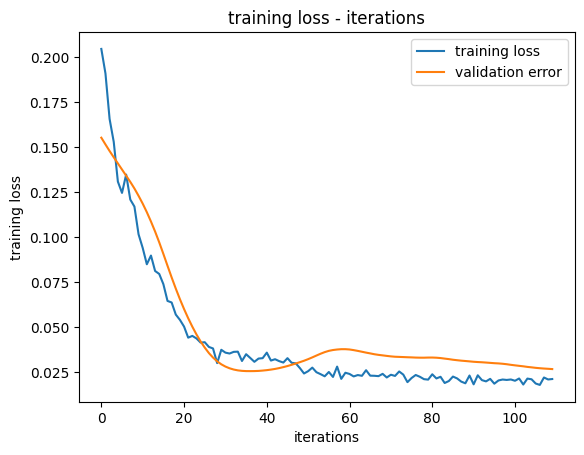

Model test error: 0.026613504445994585


0.026613504445994585

In [108]:
args = {"dataset": "AIDS",
        "tensor_neurons": 16,
        "bottle_neck_neurons": 16,
        "lr": 0.001,
        "weight_decay": 0.0,
        "epochs": 5,
        "batch_size": 128
        }

trainer = TaGSimTrainer(args,Node_Types, Edge_Types)
trainer.fit()
trainer.test()

In [109]:
def loadGraphPairs(datasetName):
    train_pairs = []
    test_pairs = []
    generatedDir = os.getcwd() + '\\dataset'+ '\\'+datasetName + '\\generated'
    testDir = os.getcwd() + '\\dataset'+ '\\'+datasetName + '\\generated_test'
    originalDir = os.getcwd() + '\\dataset'+ '\\'+datasetName + '\\original'

    filenames = os.listdir(generatedDir)
    for file in filenames:
        fileInfo = getFileInfo(file)
        graph2 = nx.read_gexf(path=generatedDir +'\\'+ file)
        graph1 = nx.read_gexf(path=originalDir +'\\'+ fileInfo[0])
        ged = fileInfo[1]
        train_pairs.append({"graph_pair":[graph1,graph2],"ged":ged})

    filenames = os.listdir(testDir)
    for file in filenames:
        fileInfo = getFileInfo(file)
        graph2 = nx.read_gexf(path=testDir +'\\'+ file)
        graph1 = nx.read_gexf(path=originalDir +'\\'+ fileInfo[0])
        ged = fileInfo[1]
        test_pairs.append({"graph_pair":[graph1,graph2],"ged":ged})
    return train_pairs, test_pairs

train_pairs, test_pairs = loadGraphPairs(datasetName="AIDS")
print(len(train_pairs))
print(len(test_pairs))
print(train_pairs[0])
print(test_pairs[0])


2793
560
{'graph_pair': [<networkx.classes.graph.Graph object at 0x0000020680B23220>, <networkx.classes.graph.Graph object at 0x0000020680B22EC0>], 'ged': [0, 4, 0, 2]}
{'graph_pair': [<networkx.classes.graph.Graph object at 0x000002064ACAD8D0>, <networkx.classes.graph.Graph object at 0x000002064ACAD8A0>], 'ged': [5, 5, 5, 5]}


In [52]:
def getFileInfo(filename):
    # if test is False:
    #     g = nx.read_gexf(path="./dataset/"+datasetName+ + filename)
    # else:
    # draw(g)
    reg = re.sub(".*NR_(?P<nr>\d+)_NID_(?P<nid>\d+)_ER_(?P<er>\d+)_EID_(?P<eid>\d+).gexf", "\g<eid>", filename)
    ori = re.sub("(?P<t>.+?)_.*", "\g<t>", filename)
    nr = int(re.sub(".*NR_(?P<t>.+?)_.*", "\g<t>", filename))
    nid = int(re.sub(".*NID_(?P<t>.+?)_.*", "\g<t>", filename))
    er = int(re.sub(".*ER_(?P<t>.+?)_.*", "\g<t>", filename))
    eid = int(re.sub(".*EID_(?P<t>.+?).gexf", "\g<t>", filename))
    gev = nr + nid + er + eid
    # return [ori+'.gexf',str(nr)+str(nid)+str(er)+str(eid)]
    return [ori + '.gexf', [nr, nid, er, eid]]
    # print('ori',ori, 'nr',nr, 'nid',nid, 'er',er, 'eid',eid,'gev',gev)


ori, ged = getFileInfo("4_NR_0_NID_4_ER_2_EID_5.gexf")
print(ori, ged)
print(sum(ged))

4.gexf [0, 4, 2, 5]
11


{('0', '1'): 1}
{'0': 'Cl', '1': 'Li'}


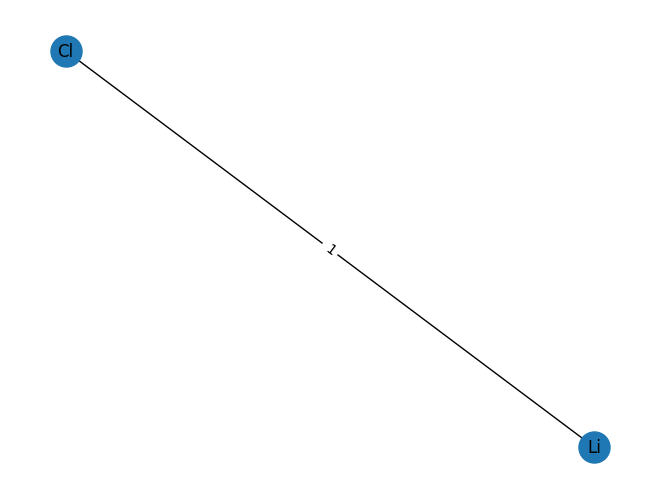

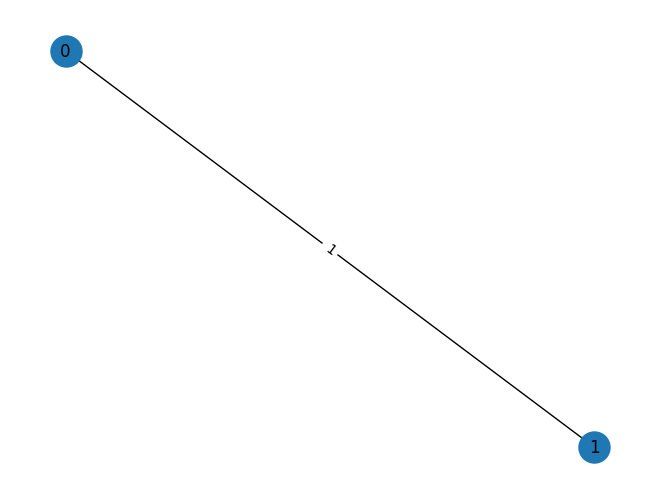

['0', '1']
{'0': 'Cl', '1': 'Li'}
{('0', '1'): 3, ('1', '5'): 2, ('1', '4'): 3, ('2', '4'): 3, ('2', '5'): 2, ('4', '5'): 2}
{'0': 'Tb', '1': 'Pt', '2': 'Cu', '3': 'S', '4': 'Si', '5': 'Ho'}


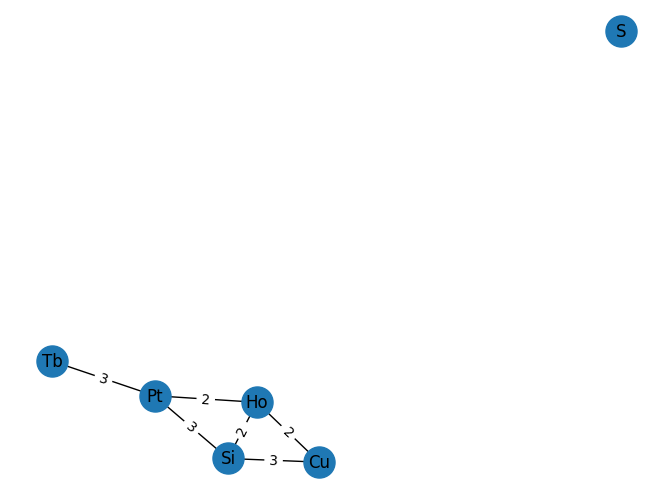

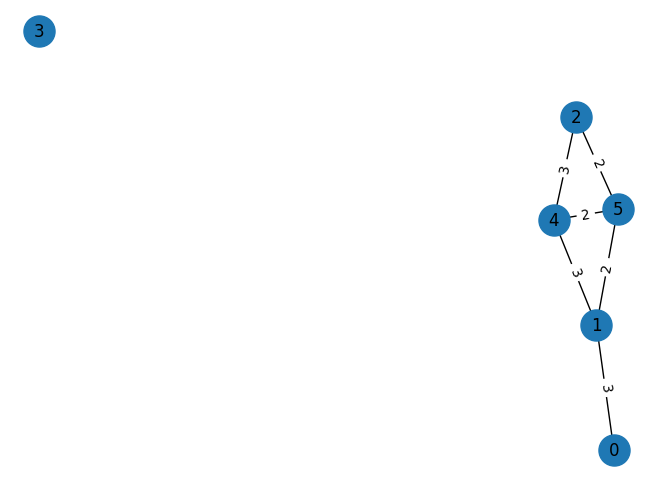

['0', '1', '2', '3', '4', '5']
{'0': 'Tb', '1': 'Pt', '2': 'Cu', '3': 'S', '4': 'Si', '5': 'Ho'}


In [20]:
g_ori = nx.read_gexf(path="./train/8116.gexf")
draw(g_ori)
print(g_ori.nodes())
print(nx.get_node_attributes(g_ori, 'type'))
# print(g_ori.edges())
# print(nx.get_edge_attributes(g_ori,'valence'))

g = nx.read_gexf(path="./export/8116_NR_2_NID_4_ER_1_EID_5.gexf")
draw(g)
print(g.nodes())
print(nx.get_node_attributes(g, 'type'))
# print(g.edges())
# print(nx.get_edge_attributes(g,'valence'))